##Development of gabor or gabor-like filter sets for voxel-wise modeling

In [1]:
%pylab inline
import numpy as np
import pandas as pd
import scipy.ndimage

from mpl_toolkits.axes_grid1 import ImageGrid
from PIL import Image
from hrf_fitting.src.features import make_gaussian,make_a_ripple
from scipy.signal import convolve2d,convolve
from skimage.filter import gabor_kernel,gabor_filter
from glob import glob
from os import path

Populating the interactive namespace from numpy and matplotlib


###load grating images for testing

In [2]:
pixel_per_deg = 34.751
pixels_per_stimulus = 768 ##I just know this
base_dir = '/musc.repo/mri/7T.cmrr/July.2015/PS/presentation/spatial_frequency/'
grating_image_names = glob(path.join(base_dir,'*.png'))
print 'removing %s' %(path.basename(grating_image_names.pop(-1)))


removing isi_screen.png


In [3]:
def parse_grating_image_names(gr):
    '''
    given a filename for a grating image, returns [phase, frequency, orientation]
    '''
    phase= gr.split('phase_')[1].split('.png')[0]
    freq = gr.split('freq_')[1].split('_ori')[0]
    ori = gr.split('ori_')[1].split('_phase')[0]
    return map(double, [phase,freq,ori])

In [4]:
grating_params = map(parse_grating_image_names,map(path.basename,grating_image_names))

In [5]:
grating_images = map(lambda img: np.array(Image.open(img).convert('L')), grating_image_names)

In [6]:
grating_df = pd.DataFrame(grating_params,columns=['phase','freq (cyc/pix)','ori'])
grating_df['grating_image_name'] = map(path.basename,grating_image_names)
# grating_df['grating_image'] = grating_images ##this seems to be not especially helpful. pain to use.
grating_df

,phase,freq (cyc/pix),ori,grating_image_name
0,0.00,0.000288,0,grating_freq_0.000288_ori_0.00_phase_0.00.png
1,3.14,0.000288,0,grating_freq_0.000288_ori_0.00_phase_3.14.png
2,0.00,0.000288,135,grating_freq_0.000288_ori_135.00_phase_0.00.png
3,3.14,0.000288,135,grating_freq_0.000288_ori_135.00_phase_3.14.png
4,0.00,0.000288,45,grating_freq_0.000288_ori_45.00_phase_0.00.png
5,3.14,0.000288,45,grating_freq_0.000288_ori_45.00_phase_3.14.png
6,0.00,0.000288,90,grating_freq_0.000288_ori_90.00_phase_0.00.png
7,3.14,0.000288,90,grating_freq_0.000288_ori_90.00_phase_3.14.png
8,0.00,0.000647,0,grating_freq_0.000647_ori_0.00_phase_0.00.png
9,3.14,0.000647,0,grating_freq_0.000647_ori_0.00_phase_3.14.png


###explore the ripple kernel

####a gabor-like ripple filter

In [7]:
def complex_ripple_filter(freq,center,fwhm,n_pix):
    '''
    freq ~ cyc/image
    
    center ~ (x,y) in pixels, origin is center of picture
    
    fwhm ~ full-width half max of Gaussian envelope = diameter in pixels at half-max
    
    n_pix ~ size of square image in pixels
    
    '''
    phase = 0
    on_ripple = make_a_ripple(freq,phase,center,n_pix)*make_gaussian(center,fwhm,n_pix)
    phase = np.pi/2.
    off_ripple = make_a_ripple(freq,phase,center,n_pix)*make_gaussian(center,fwhm,n_pix)
    return off_ripple + 1j*on_ripple

####a set of ripples where the fwhm is proportional to the frequency

In [8]:
cycles_per_pixel = np.unique(grating_df['freq (cyc/pix)'])
cycles_per_fwhm = 1.0
fwhms_per_kernel = 1.5

# scales = cycles_per_fwhm/cycles_per_pixel ##pix/fwhm
# print 'assuming %0.2f cycles per fwhm, we have pixels per fwhm %s' %(cycles_per_fwhm,scales)
# print 'assuming that kernels have %0.2d pixels per fwhm, we have %0.2d pixels per kernel'

metrics = {'cycles per pixel':cycles_per_pixel,
           'pixels per cycle': 1./cycles_per_pixel,
           'cycles per stimulus': cycles_per_pixel*pixels_per_stimulus,
           'cycles per deg.': cycles_per_pixel*pixel_per_deg,
           'fwhm (pix)': np.clip(cycles_per_fwhm/cycles_per_pixel,0,pixels_per_stimulus),
           'prf_size (deg)': np.clip(cycles_per_fwhm/cycles_per_pixel,0,pixels_per_stimulus)/pixel_per_deg/2.,
           'n_pix': np.clip(fwhms_per_kernel*cycles_per_fwhm/cycles_per_pixel,0,pixels_per_stimulus)}

fm = pd.DataFrame(metrics)
fm

,cycles per deg.,cycles per pixel,cycles per stimulus,fwhm (pix),n_pix,pixels per cycle,prf_size (deg)
0,0.010008,0.000288,0.221184,768.000000,768.000000,3472.222222,11.050042
1,0.022484,0.000647,0.496896,768.000000,768.000000,1545.595054,11.050042
2,0.050528,0.001454,1.116672,687.757909,768.000000,687.757909,9.895512
3,0.113566,0.003268,2.509824,305.997552,458.996328,305.997552,4.402716
4,0.255316,0.007347,5.642496,136.109977,204.164965,136.109977,1.958361
5,0.573913,0.016515,12.683520,60.551014,90.826521,60.551014,0.871213
6,1.290096,0.037124,28.511232,26.936753,40.405129,26.936753,0.387568
7,2.900006,0.083451,64.090368,11.983080,17.974620,11.983080,0.172413


####view the kernels
Note that the in this example the number of pixels occupied by each kernel is proportional to the fwhmm. This is appropriate if we intend to pre-process using "convolve2d" or the like.

In order to visualize relative sizes of the kernels, we embed them (shittily) in an image with the full resolution of the visual field.

Notice we've set the fwhm to ensure that there is exactly one cycle per fwhm. We then set the number of pixels for each filter to 1.5 times the fwhm. So we end up with a picture of one cycle for each frequency.

In [10]:
ripple_kernels = []
for _,row in fm.iterrows():
    fwhm = int(row['fwhm (pix)'])
    n_pix = int(row['n_pix'])
    freq = row['cycles per pixel']*n_pix
    ripple_kernels.append(complex_ripple_filter(freq,(0,0),fwhm,n_pix))

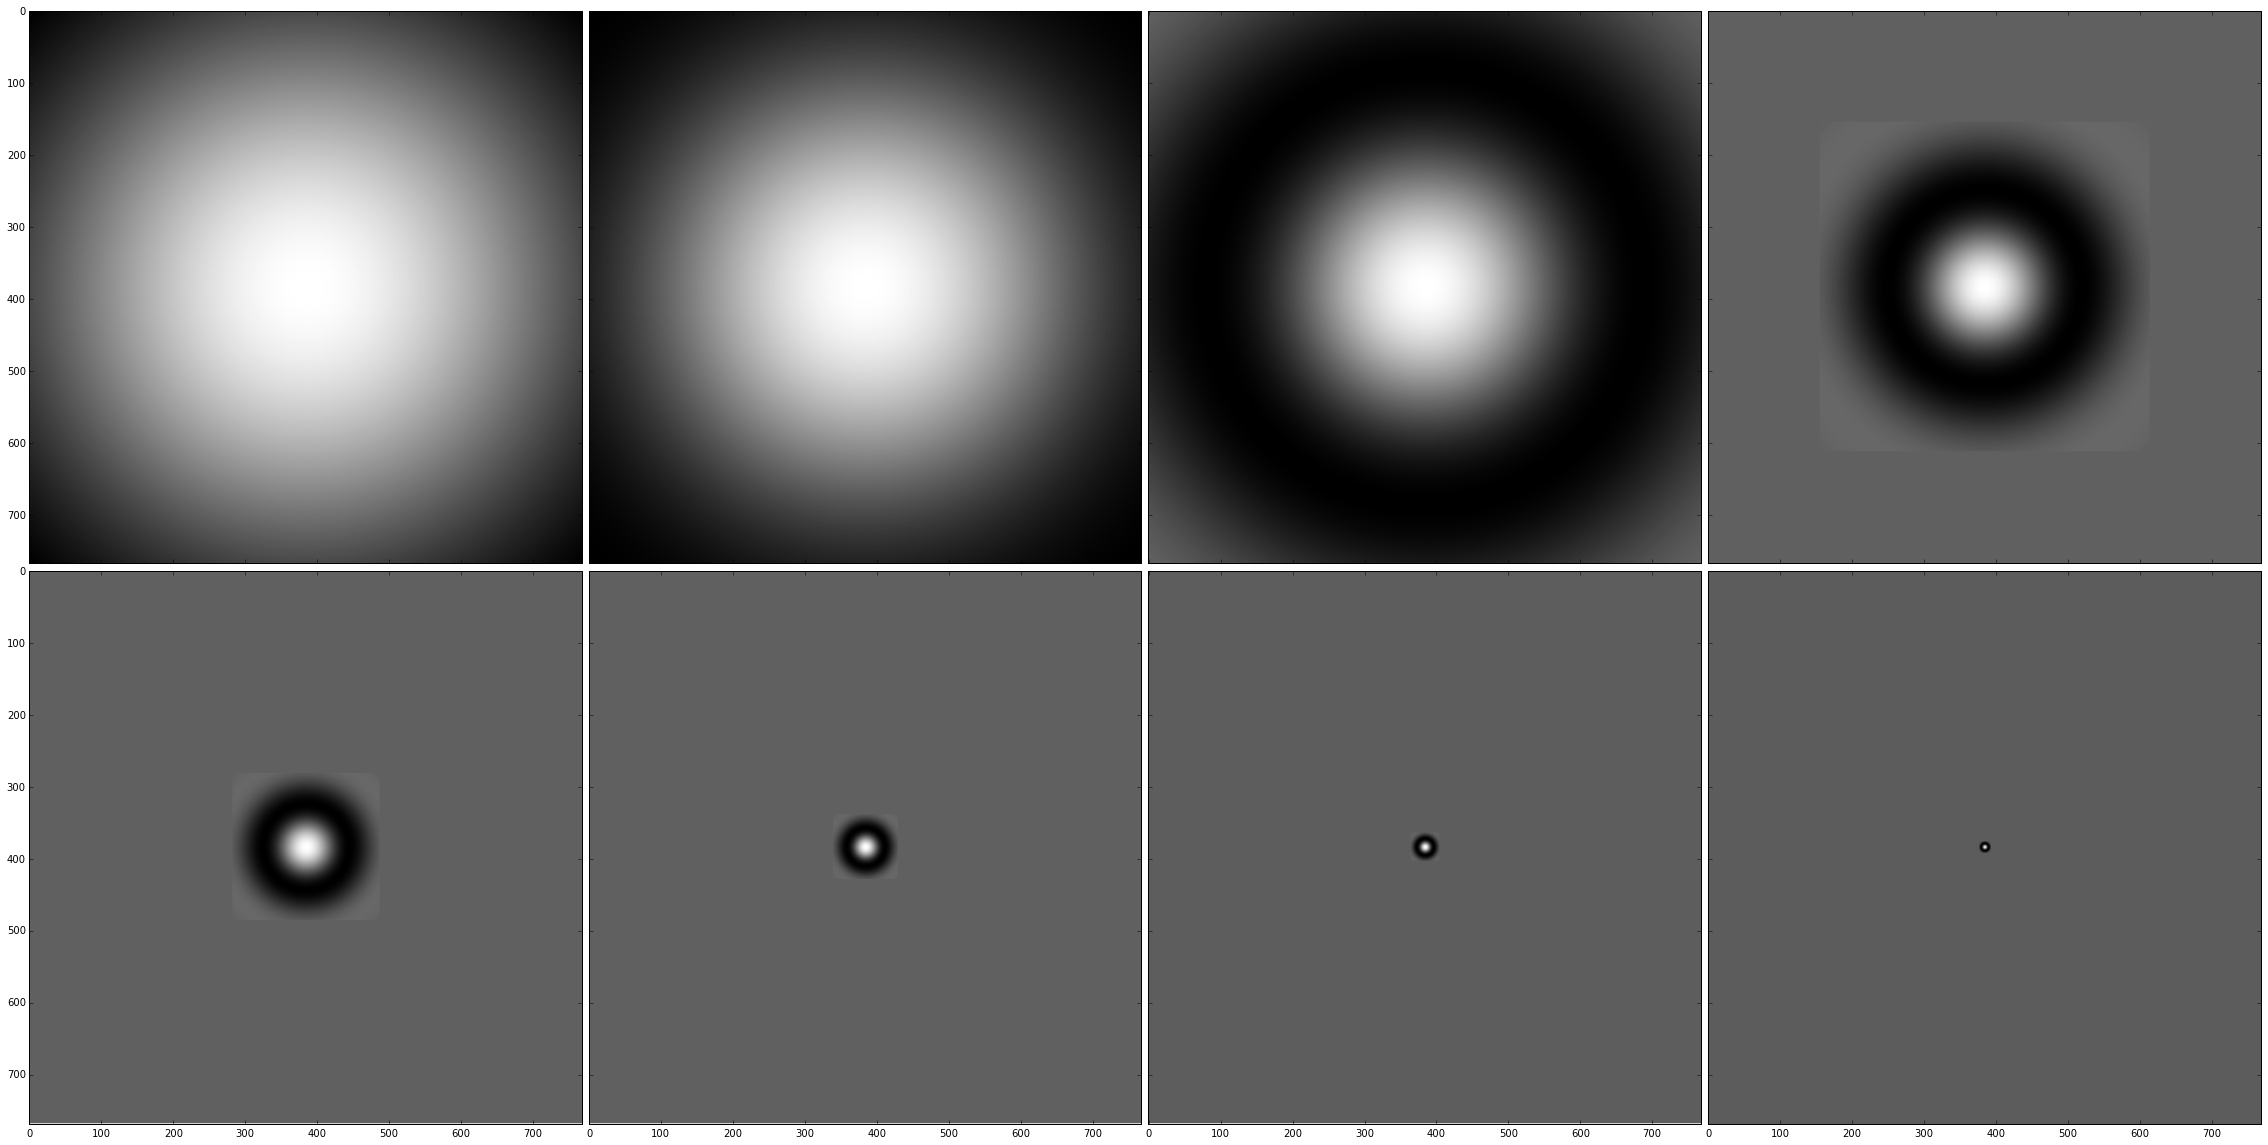

In [11]:
fig = plt.figure(1, (40,40))
grid = ImageGrid(fig, 111, # similar to subplot(111)
                nrows_ncols = (2, 4), # creates 2x2 grid of axes
                axes_pad=0.1, # pad between axes in inch.
                )

for i in range(8):
    pad_width = int(np.ceil((pixels_per_stimulus-ripple_kernels[i].shape[0])/2.))
    cval = np.real(ripple_kernels[i])[0,0]
    pic = np.pad(np.real(ripple_kernels[i]),(pad_width,),mode='constant',constant_values=(cval,))
    grid[i].imshow(pic, cmap=cm.gray)
    


####a set of kernels with a fixed frequency but a variety of scales

In [61]:
num_filters=4
choose_freq = 5 ##index determining fixed frequency
deg_per_radius = np.linspace(0.5, 6., endpoint=True, num=num_filters)
pix_per_fwhm = deg_per_radius*2.*pixel_per_deg  
freq = cycles_per_pixel[choose_freq]
# npix = np.clip(fwhms_per_kernel*fwhm,0,pixels_per_stimulus)

print 'prf size: %s' %(deg_per_radius,)  ##prf size (deg)
print 'spatial freq. (cyc/deg):%s' %(freq*pixel_per_deg,) ##frequency (cyc / deg)
print 'number of cycles per radius: %s' %(freq*pixel_per_deg*deg_per_radius,)  ##number of cycles

fixed_kernels = np.zeros((num_filters,pixels_per_stimulus,pixels_per_stimulus),dtype=np.complex64)
for ii,fw in enumerate(pix_per_fwhm):
    fixed_kernels[ii,:,:] = complex_ripple_filter(freq*pixels_per_stimulus,(0,0),int(fw),pixels_per_stimulus)

prf size: [ 0.5         2.33333333  4.16666667  6.        ]
spatial freq. (cyc/deg):0.573912765
number of cycles per radius: [ 0.28695638  1.33912978  2.39130319  3.44347659]


####view
In this case, we not linking the number of pixels per kernel to the fwhm. This is the more appropriate way to design the kernels if we are using "dottensor" or "einsum" to process the images.

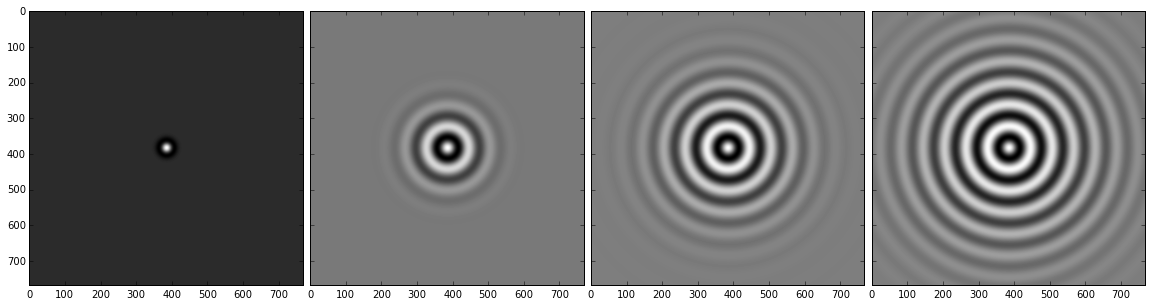

In [62]:
fig = plt.figure(1, (20,20))
grid = ImageGrid(fig, 111, # similar to subplot(111)
                nrows_ncols = (1, num_filters), # creates 2x2 grid of axes
                axes_pad=0.1, # pad between axes in inch.
                )

for i in range(num_filters):
    grid[i].imshow(np.real(fixed_kernels[i,:,:]), cmap=cm.gray)
    


####apply filters to grating images

In [63]:
imgs = np.array(map(lambda img: np.array(Image.open(img).convert('L')),
           map(lambda x: path.join(base_dir,x),
               list(grating_df.grating_image_name))),ndmin=3)

In [64]:
convos = np.abs(np.einsum('kij,lij->kl', imgs, fixed_kernels))

In [65]:
for nn in range(num_filters):
    grating_df['scale_%d' %(nn)] = convos[:,nn]
    

####view tuning functions

In [66]:
filter_columns = map(lambda x: 'scale_%d' %(x), range(num_filters))

Frequency

In [67]:
freqs = grating_df.groupby(by=['freq (cyc/pix)'],as_index=False)

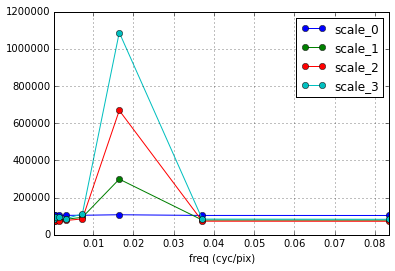

In [68]:
freqs[filter_columns].mean().plot(x='freq (cyc/pix)',style='o-',use_index=True)

As expected, frequency tuning peaks at the selected frequency (i.e., we chose the highest frequency of all gratings).

####Orientation

In [69]:
oris = grating_df.groupby(by=['ori'],as_index=False)

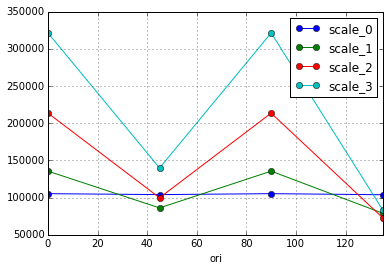

In [70]:
oris[filter_columns].mean().plot(x='ori',style='o-',use_index=True)

Huh. Weird. For high-frequencies, the large-scale filters are orientation selective. Edge effects? Different orientations meet the edge of the image at different angles, resulting in some sort of edge effect. 

####Phase

In [71]:
phase = grating_df.groupby(by=['phase'],as_index=False)

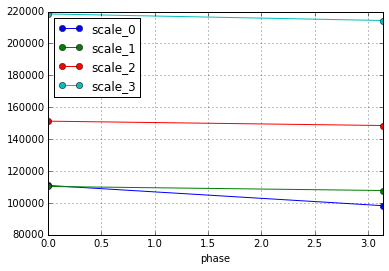

In [72]:
phase[filter_columns].mean().plot(x='phase',style='o-',use_index=True)

Okay good, no phase selectivity, which there shouldn't be.

###Construct a ripple filter set

In [ ]:
##prf sizes
##spatial frequencies
##--positions will be determined by 
##kernel overlap (as fraction of prf size)
##boundary condition (as fraction of prf size)

In [155]:
def compute_grid_corners(n_pix, kernel_size,boundary_condition=0):
    '''
    compute_grid_corners(n_pix, kernel_size)
    return corners of placement grid in image of size n_pix given kernel_size (radius)
    and a boundary_condition. boundary_condition >= 0 is the fraction of the kernel_size 
    that is allowed to hang over the edge of the image
    [left, right, top, bottom]
    '''
    if n_pix % 2 == 0:
        pix_min = -n_pix/2
        pix_max = -pix_min
    else:
        pix_min = -(n_pix-1)/2
        pix_max = -pix_min+1
    
    ks = kernel_size*boundary_condition
    return np.array([pix_min+ks,pix_max-ks,pix_min+ks,pix_max-ks])

def compute_grid_spacing(kernel_size,fraction_of_kernel_size):
    '''
    compute_grid_spacing(kernel_size,fraction_of_kernel_size)
    
    returns integer distance in pixels between each kernel.
    spacing =  int(kernel_size*fraction_of_kernel_size)
   
    '''
    
    gs = int(kernel_size*fraction_of_kernel_size)
    return gs

def construct_placement_grid(grid_corners, grid_spacing):
    '''
    X,Y = construct_placement_grid(grid_corners, grid_spacing)
    given [left,right,top,bottom] corners of the grid, and an integer pixel spacing,
    return a grid of kernel placements.
    '''
    X,Y = meshgrid(np.arange(grid_corners[0],grid_corners[1],step=grid_spacing),
                   np.arange(grid_corners[2],grid_corners[3],step=grid_spacing))
    return X,Y

def construct_kernel_set(freq,kernel_size,n_pix,kernel_spacing, boundary_condition=0):
    '''
    construct_kernel_set(freq,kernel_size,n_pix,kernel_spacing, boundary_condition=0)
    
    freq ~ cyc/n_pix
    
    kernel_size ~ pix. the fwhm of the gaussian envelope, effectively the kernel radius.
    
    n_pix ~ pixels per side of square image
    
    kernel_spacing ~ in units of kernel_size. 
    
    boundary_condition ~ >= 0. fraction of kernel that would hang off the side of the image.
    
    returns 3D numpy array of complex numbers ~ [number_of_filters] x [n_pix] x [n_pix]
    where the number of filters is determined by the spacing and boundary condition arguments.
    
    '''
    grid_corners = compute_grid_corners(n_pix, kernel_size,boundary_condition)
    grid_spacing = compute_grid_spacing(kernel_size,kernel_overlap)
    gridX, gridY = construct_placement_grid(grid_corners, grid_spacing)
    iter_x = np.ravel(gridX)
    iter_y = np.ravel(gridY)
    kernel_set = np.zeros((len(iter_x),n_pix,n_pix)).astype(complex)
    count = 0    
    print 'constructing %d filters' %(len(iter_x))
    for x,y in zip(iter_x,iter_y):
        kernel_set[count,:,:] = complex_ripple_filter(freq, (x,y),kernel_size,n_pix)
        count += 1
    return kernel_set

In [149]:
filters = construct_kernel_set(20,90.,768,2,boundary_condition=2)

constructing 9 filters


In [139]:
filters.shape

(81, 768, 768)

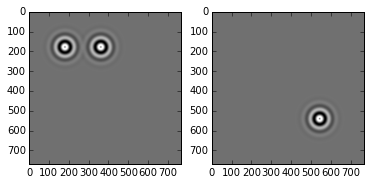

In [154]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.imag(filters[0,:,:])+np.imag(filters[1,:,:]), cmap=cm.gray)
plt.subplot(1,2,2)
plt.imshow(np.imag(filters[8,:,:]), cmap=cm.gray)